# fugure 4A

In [3]:
import numpy as np
import os
import pickle
from sklearn.metrics import auc

load_root = '../dataset/temporal_filters_ROC_95'
all_results = []
mean_aucs = []

# results为长为5的tuple，(seed, accuracy, roc_auc, fpr, tpr)
# random_seeds = [42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
for idx in range(0, 10):
    idx_file = os.path.join(load_root, f'idx_{idx}_2-300.pkl')
    with open(idx_file, 'rb') as f:
        idx_results = pickle.load(f)
        all_results.append(idx_results)

    all_fpr = np.unique(np.concatenate([result[3] for result in idx_results]))
    mean_tpr = np.zeros_like(all_fpr)
    for result in idx_results:
        mean_tpr += np.interp(all_fpr, result[3], result[4])
    mean_tpr /= 10
    mean_auc = auc(all_fpr, mean_tpr)
    mean_aucs.append(mean_auc)
max_auc_idx = np.argmax(mean_aucs)

In [4]:
all_results = []
mean_aucs = []
std_aucs = [] 
for idx in range(0, 10):
    idx_file = os.path.join(load_root, f'idx_{idx}_2-300.pkl')
    with open(idx_file, 'rb') as f:
        idx_results = pickle.load(f)
        all_results.append(idx_results)

    # 提取每个文件中所有的roc_auc值
    aucs = [result[2] for result in idx_results]  # 每个文件的AUC值，假设在result[2]位置
    mean_auc = np.mean(aucs)  # 计算该文件的AUC均值
    std_auc = np.std(aucs)  # 计算该文件的AUC标准差

    mean_aucs.append(mean_auc)  # 将均值添加到mean_aucs列表
    std_aucs.append(std_auc)  # 将标准差添加到std_aucs列表
    
    print(f"File {idx}: Mean AUC = {mean_auc}, AUC Std = {std_auc}")


File 0: Mean AUC = 0.8839714439751198, AUC Std = 0.0027653839757202305
File 1: Mean AUC = 0.875014191127983, AUC Std = 0.0022882945735655407
File 2: Mean AUC = 0.8512268308114562, AUC Std = 0.0030483956470974153
File 3: Mean AUC = 0.608455417134506, AUC Std = 0.0038054968647059937
File 4: Mean AUC = 0.6322548744408205, AUC Std = 0.006091856433174375
File 5: Mean AUC = 0.6374495401807196, AUC Std = 0.0032609236825068386
File 6: Mean AUC = 0.7852559304211446, AUC Std = 0.004896469706331378
File 7: Mean AUC = 0.9114486980698284, AUC Std = 0.0017275725264283956
File 8: Mean AUC = 0.849899882371812, AUC Std = 0.004066535064501918
File 9: Mean AUC = 0.6009181904863746, AUC Std = 0.0034996404485605234


In [5]:
all_results = []
mean_aucs = []
std_aucs = [] 
for idx in [0,1,2,3,4,5,6,8,9]:
    idx_file = os.path.join(load_root, f'idx_{idx}_2-300.pkl')
    with open(idx_file, 'rb') as f:
        idx_results = pickle.load(f)
        all_results.append(idx_results)

    # 提取每个文件中所有的roc_auc值
    aucs = [result[2] for result in idx_results]  # 每个文件的AUC值，假设在result[2]位置
    mean_auc = np.mean(aucs)  # 计算该文件的AUC均值
    std_auc = np.std(aucs)  # 计算该文件的AUC标准差

    mean_aucs.append(mean_auc)  # 将均值添加到mean_aucs列表
    std_aucs.append(std_auc)  # 将标准差添加到std_aucs列表
    
print(f"=Mean AUC = {np.mean(mean_aucs)}, AUC Std = {np.mean(std_aucs)}")
    


=Mean AUC = 0.7471607001055485, AUC Std = 0.003746999599573801


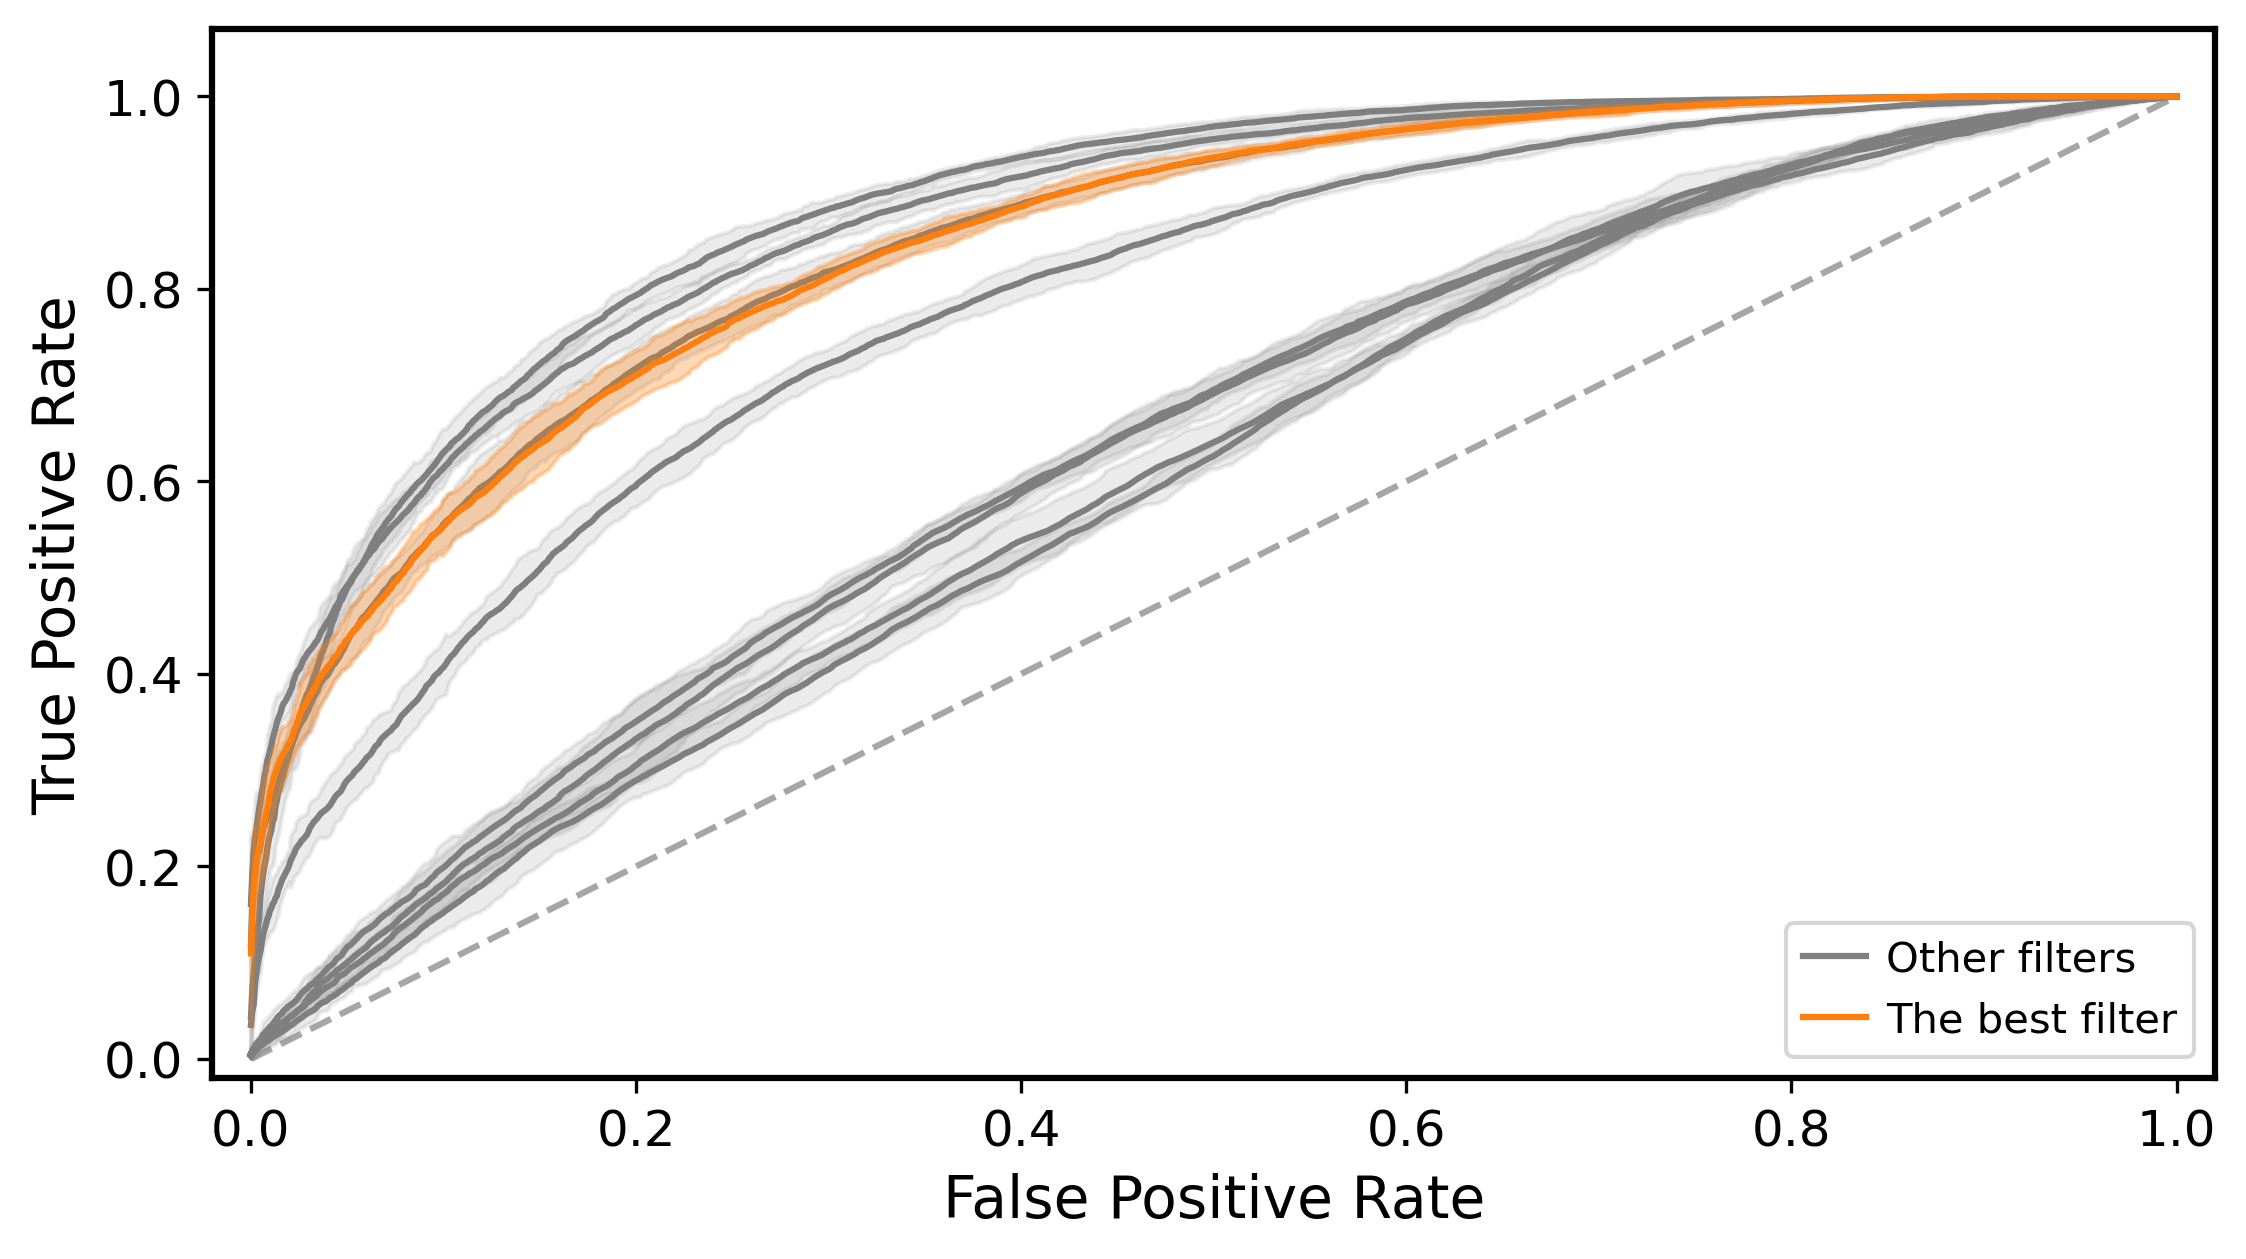

In [7]:
import matplotlib.pyplot as plt

# 设置专业期刊样式
# 设置专业期刊样式
# plt.rcParams.update({
#     'font.family': 'Arial',  # 使用期刊推荐字体
#     'font.size': 9,
#     'axes.titlesize': 11,
#     'axes.labelsize': 10,
#     'xtick.labelsize': 9,
#     'ytick.labelsize': 9,
#     'legend.fontsize': 9,
#     'axes.linewidth': 1.0,
#     'lines.linewidth': 1.5,
#     'figure.dpi': 300,
#     'savefig.dpi': 1200,
#     'figure.autolayout': True
# })
plt.rcParams.update({
    'font.family': 'DejaVu Sans',  
    'font.size': 12,                   # 基础字号
    'axes.labelsize': 14,              # 轴标签字号
    'axes.linewidth': 1.5,             # 轴线宽
    'legend.fontsize': 10,             # 图例字号
    'xtick.labelsize': 12,             # X轴刻度字号
    'ytick.labelsize': 12,             # Y轴刻度字号
    'pdf.fonttype': 42,                # 确保输出文字可编辑
    'ps.fonttype': 42,
    'figure.dpi': 300                  # 高分辨率
})


plt.figure(figsize=(7.8, 4.5))  # 单栏常用尺寸（单位英寸，1 inch=2.54 cm）
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
    
added_other = False 

for idx, idx_results in enumerate(all_results):
    all_fpr = np.unique(np.concatenate([result[3] for result in idx_results]))
    mean_tpr = np.zeros_like(all_fpr)

    for result in idx_results:
        mean_tpr += np.interp(all_fpr, result[3], result[4])
    mean_tpr /= len(idx_results)
    
    # 动态设置图例标签
    if idx == max_auc_idx:
        label = 'The best filter'  
        color = '#FF7F0E'          
        z_order = 3               
        fill_alpha = 0.3
    else:
        color = '#7F7F7F'          
        z_order = 1
        fill_alpha = 0.15
        label = 'Other filters' if not added_other else None  
        if not added_other: added_other = True

    # 绘制主曲线
    plt.plot(
        all_fpr, mean_tpr,
        color=color,
        label=label,
        zorder=z_order
    )
    
    # 绘制置信区间
    tprs = np.array([np.interp(all_fpr, res[3], res[4]) for res in idx_results])
    std_tpr = tprs.std(axis=0)
    plt.fill_between(
        all_fpr,
        np.maximum(mean_tpr - 1.96*std_tpr, 0),
        np.minimum(mean_tpr + 1.96*std_tpr, 1),
        color=color,
        alpha=fill_alpha,
        zorder=2
    )

# ============================= 图表精修 =============================
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.07])
plt.xlabel('False Positive Rate')#, fontweight='bold')
plt.ylabel('True Positive Rate')#, fontweight='bold')

# 优化图例显示
# plt.legend(
#     loc='lower right',
#     frameon=True,
#     edgecolor='black',
#     handlelength=1.5,    # 加长图例线段
#     handletextpad=0.5    # 调整文字间距
# )
plt.legend(
    loc='lower right',
    frameon=True,
    handlelength=1.5, handletextpad=0.5,
    borderpad=0.4, edgecolor='0.8'
)


# legend = ax.legend(loc='lower right', frameon=True, 
#                   handlelength=1.5, handletextpad=0.5,
#                   borderpad=0.4, edgecolor='0.8')
# legend.get_frame().set_linewidth(0.8)

# 添加刻度精度（可选）
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

# 标题设置（根据期刊要求选择是否包含）
# plt.title('ROC Analysis with Confidence Intervals', pad=12, fontsize=13)

# 调整边距和保存输出（保存为矢量格式便于出版）
plt.tight_layout(pad=1.5)
# plt.savefig('ROC_Curves.tiff', dpi=300, bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})  
plt.show()

figure 3B

In [11]:
import numpy as np
import pickle

load_file = '../dataset/TBF_AUC_regions.pkl'
with open(load_file, 'rb') as f:
    TBF_region_results = pickle.load(f)

regions = list(TBF_region_results.keys())
accuracies_means = [np.mean(TBF_region_results[region]) for region in regions] 
accuracies_stds = [np.std(TBF_region_results[region]) for region in regions]

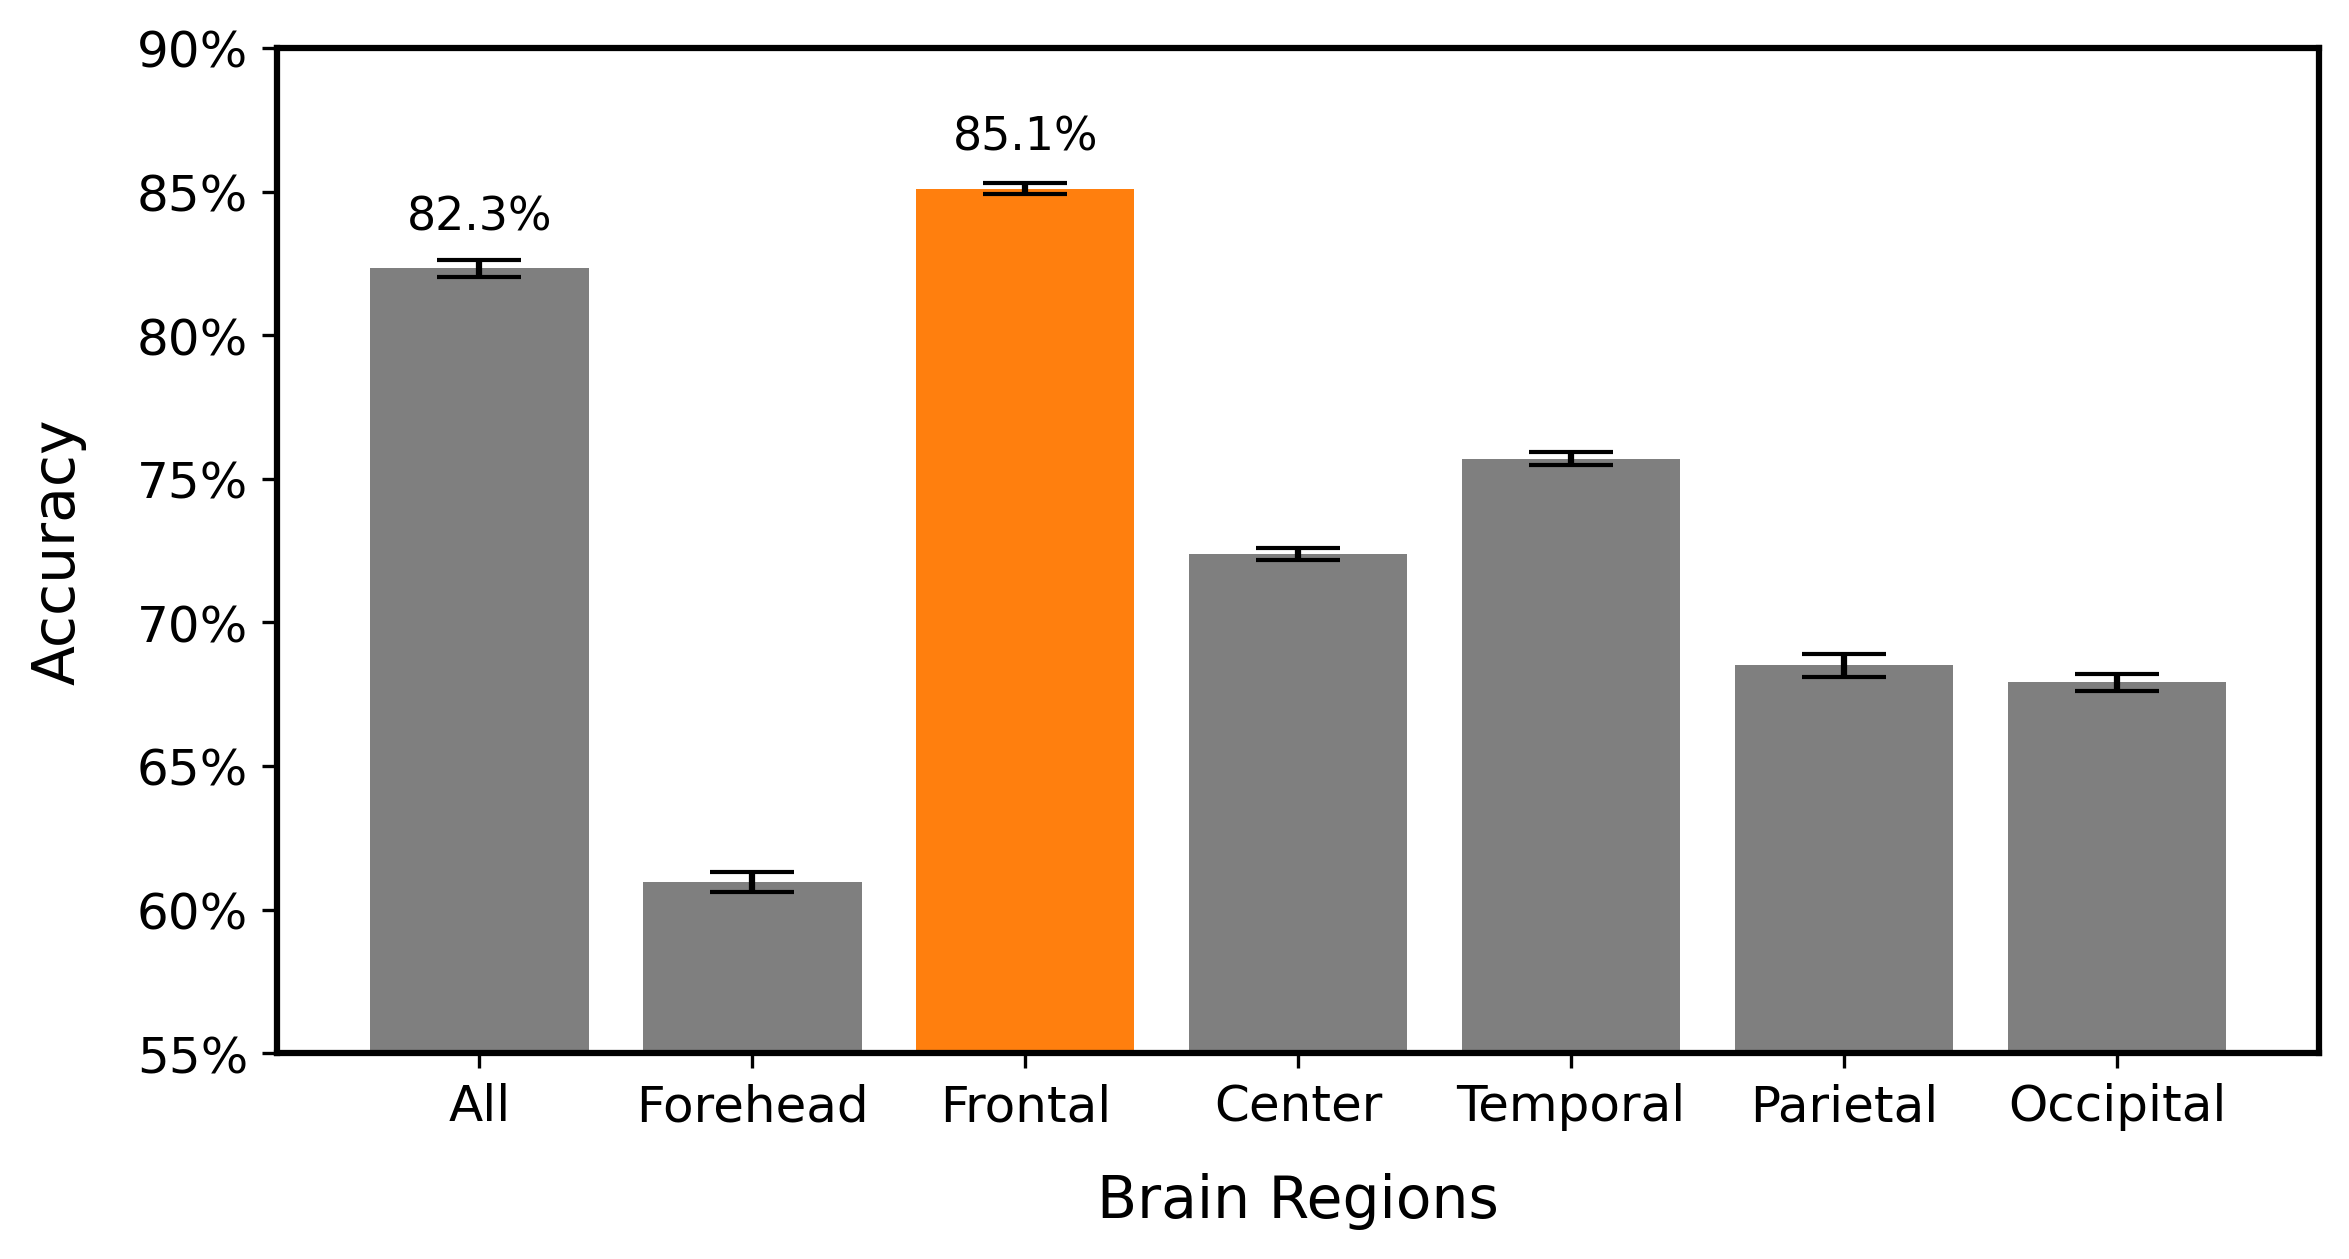

In [12]:
import matplotlib.pyplot as plt


plt.rcParams.update({
    'font.family': 'DejaVu Sans', 
    'font.size': 12,                   # 基础字号
    'axes.labelsize': 14,              # 轴标签字号
    'axes.linewidth': 1.5,             # 轴线宽
    'legend.fontsize': 10,             # 图例字号
    'xtick.labelsize': 12,             # X轴刻度字号
    'ytick.labelsize': 12,             # Y轴刻度字号
    'pdf.fonttype': 42,                # 确保输出文字可编辑
    'ps.fonttype': 42,
    'figure.dpi': 300                  # 高分辨率
})

plt.figure(figsize=(8.13, 4.5))  

bar_colors = ['#7F7F7F'] * len(regions)  
max_idx = accuracies_means.index(max(accuracies_means))
bar_colors[max_idx] = '#FF7F0E'         

bars = plt.bar(
    regions, 
    accuracies_means,
    color=bar_colors,
    yerr=accuracies_stds,
    capsize=10       
)

plt.ylim(0.55, 0.9)
plt.ylabel('Accuracy', labelpad=12)#, fontweight='bold', labelpad=12)  
plt.xlabel('Brain Regions', labelpad=10)#, fontweight='bold', labelpad=10)

# Y轴格式化为百分比（保留一位小数）
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# 数据标签添加（动态调整位置）
for bar, region in zip(bars, regions):
    height = bar.get_height()
    if region =='All' or height == max(accuracies_means):
        plt.text(bar.get_x() + bar.get_width() / 2, 
            height + 0.01, 
            '{:.1%}'.format(height), 
            ha='center',
            va='bottom',
            fontsize=11
            )

# 保存输出（推荐矢量格式）
plt.tight_layout(pad=1.5)
# plt.savefig('TBF_AUC_regions_221.tiff', dpi=300, bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})  
plt.show()

figure 3C

In [13]:
import numpy as np
RF=np.load('../dataset/accuracies_RandomForest.npz')
MLP=np.load('../dataset/accuracies_MLP.npz')
GBM=np.load('../dataset/accuracies_GradientBoosting.npz')

In [14]:
mean_RF, std_RF = RF['mean'][::-1], RF['std']
mean_MLP, std_MLP = MLP['mean'][::-1], MLP['std']
mean_GBM, std_GBM = GBM['mean'][::-1], GBM['std']
N = 10
ci_RF = 1.96 * std_RF / np.sqrt(N)
ci_MLP = 1.96 * std_MLP / np.sqrt(N)
ci_GBM = 1.96 * std_GBM / np.sqrt(N)
x_values = np.arange(0.1, 1.0, 0.1)

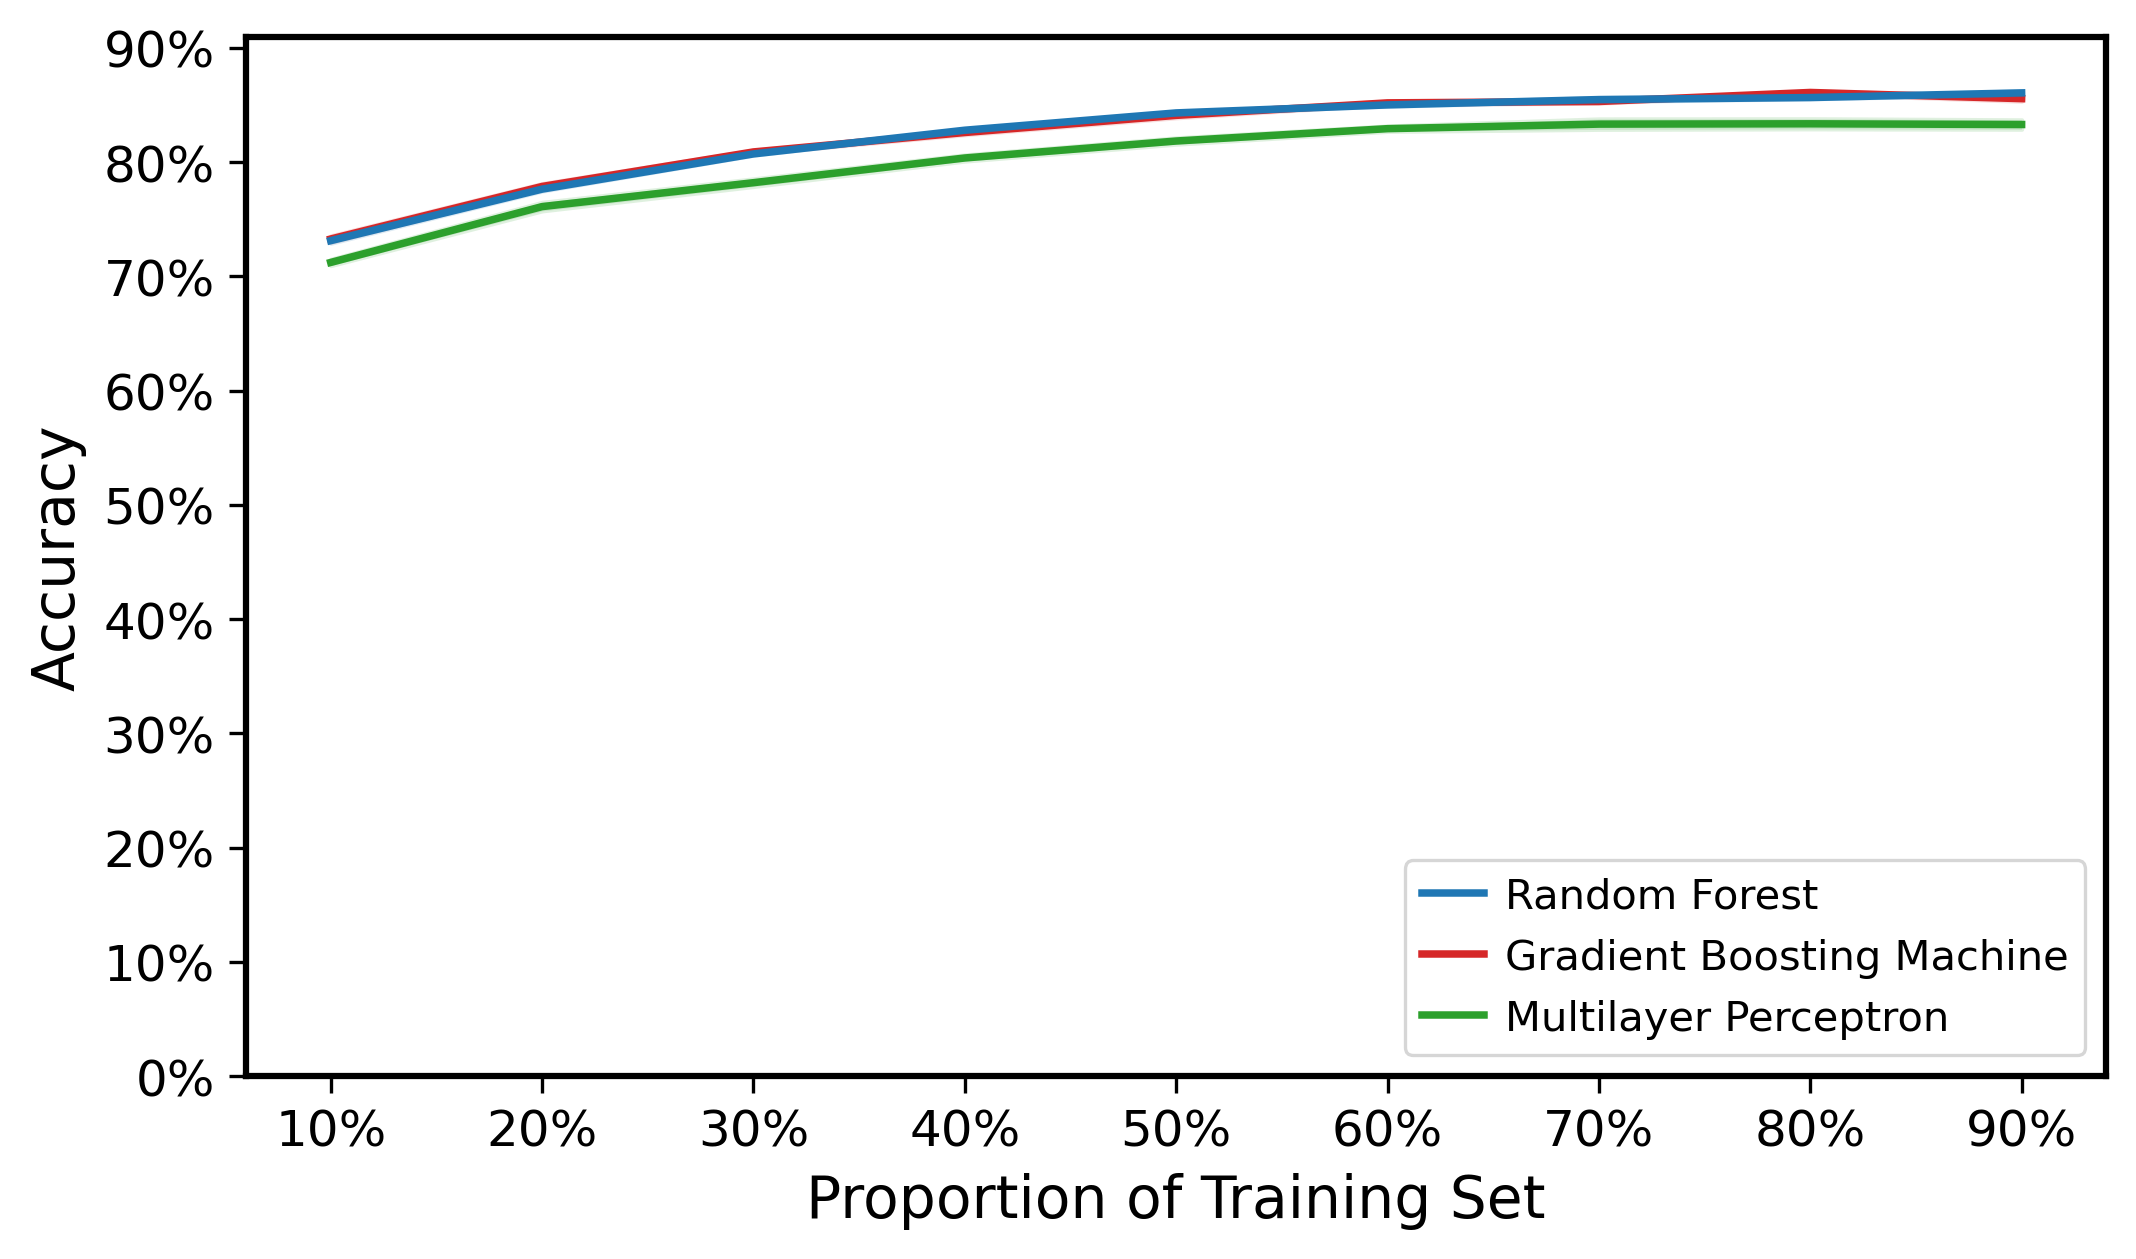

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

plt.rcParams.update({
    'font.family': 'DejaVu Sans', 
    'font.size': 12,                   # 基础字号
    'axes.labelsize': 14,              # 轴标签字号
    'axes.linewidth': 1.5,             # 轴线宽
    'legend.fontsize': 10,             # 图例字号
    'xtick.labelsize': 12,             # X轴刻度字号
    'ytick.labelsize': 12,             # Y轴刻度字号
    'pdf.fonttype': 42,                # 确保输出文字可编辑
    'ps.fonttype': 42,
    'figure.dpi': 300                  # 高分辨率
})


# 创建专业配色方案
colors = {
    'Random Forest': '#1f77b4',
    'Gradient Boosting Machine': '#d62728',
    'Multilayer Perceptron': '#2ca02c'
}

# 生成图表
fig, ax = plt.subplots(figsize=(8, 4.5))  # 双栏(3.54英寸) vs 单栏(7.25英寸)

# 绘制带误差带的曲线
def plot_model(ax, x, mean, std, label, color, zorder):
    line = ax.plot(x, mean, label=label, color=color, 
                  zorder=zorder, linewidth=1.8)
    ax.fill_between(x, mean - std, mean + std, 
                   color=color, alpha=0.15, zorder=zorder-0.1)
    return line

# 绘制各模型
plot_model(ax, x_values, mean_RF, ci_RF, 'Random Forest', colors['Random Forest'], 3)
plot_model(ax, x_values, mean_GBM, ci_GBM, 'Gradient Boosting Machine', colors['Gradient Boosting Machine'], 2)
plot_model(ax, x_values, mean_MLP, ci_MLP, 'Multilayer Perceptron', colors['Multilayer Perceptron'], 1)

# 设置坐标轴格式
ax.set_xlabel('Proportion of Training Set')#, fontweight='semibold')
ax.set_ylabel('Accuracy')#, fontweight='semibold')  # 修改坐标轴标签
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))  # 设置为百分比格式
ax.xaxis.set_major_formatter(PercentFormatter(xmax=1.0))  # 设置为百分比格式
ax.set_ylim(0.0, 0.91)

# 优化刻度线
ax.tick_params(axis='both', which='major', width=0.8, length=4)
ax.tick_params(axis='both', which='minor', width=0.6, length=3)

# 添加专业网格线
# ax.grid(True, which='major', linestyle='--', linewidth=0.6, alpha=0.6)
# ax.grid(True, which='minor', linestyle=':', linewidth=0.4, alpha=0.4)

# 优化图例
legend = ax.legend(loc='lower right', frameon=True, 
                  handlelength=1.5, handletextpad=0.5,
                  borderpad=0.4, edgecolor='0.8')
legend.get_frame().set_linewidth(0.8)

# 设置科学刻度间距
from matplotlib.ticker import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# 添加统计注释
# ax.text(0.05, 0.95, f'N = {N} repeats', 
#        transform=ax.transAxes, va='top', ha='left',
#        fontsize=8, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# 导出为出版级文件
# plt.savefig('model_comparison.tiff', bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})
plt.show()


figure 3D

In [6]:
# 结果生成代码合集（暂存）
import pickle
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import skew, kurtosis, zscore
from collections import defaultdict
import torch.nn.functional as F
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import os
# ========================================数据与TBF读取========================================
with open('/mnt/dataset0/zhuyan/narcosis/thu_ep/data_A.pkl', 'rb') as file_a:
    data_A = pickle.load(file_a)
with open('/mnt/dataset0/zhuyan/narcosis/thu_ep/data_B.pkl', 'rb') as file_b:
    data_B = pickle.load(file_b)

filtered_data_combined_A = []
filtered_data_combined_B = []
scaler_A = StandardScaler()
for sample in data_A:
    segment_data = sample['segment_data']
    label_id = sample['label_id']
    subject_id=sample['subject_id']
    segment_data = np.array(segment_data)
    standardized_segment_data = scaler_A.fit_transform(segment_data.T).T
    filtered_data_combined_A.append((segment_data, label_id, subject_id, standardized_segment_data))

scaler_B = StandardScaler()
for sample in data_B:
    segment_data = sample['segment_data']
    label_id = sample['label_id']
    subject_id=sample['subject_id']
    segment_data = np.array(segment_data)
    standardized_segment_data = scaler_B.fit_transform(segment_data.T).T
    filtered_data_combined_B.append((segment_data, label_id, subject_id, standardized_segment_data))

seed_number=548
i=4
data_path = fr'/mnt/dataset0/zhuyan/narcosis/run_in_much_time_0612_lr_0.0015_wd_0.007/seed_{seed_number}/{i}/contribution_test_results/mask_filter/Temporal_contributions_all.npy'
temporal = np.load(data_path, allow_pickle=True)
temporal_weights = temporal['weights']
weights_2 = temporal[7]['weights']
channels_of_interest = range(2, 12)
channels_of_interest_all = range(0, 29)
# ========================================特征提取方法合集========================================
def convolve_and_extract(data_filtered, weights):
        data_torch = torch.tensor(data_filtered, dtype=torch.float32).view(1, 1, -1)  # 转换为Torch Tensor
        filter_torch = torch.tensor(weights, dtype=torch.float32).view(1, 1, -1)
        convolved_data = F.conv1d(data_torch, filter_torch)  # 卷积操作
        convolved_data = convolved_data.cpu().detach().numpy()  # 转为numpy
        return abs(convolved_data.flatten())  # 取绝对值并扁平化

def extract_features(data, weights, channels_of_interest):
    data_selected_channels = data[channels_of_interest, :]
    features = convolve_and_extract(data_selected_channels, weights)
    features_combined = np.concatenate([features])

    return features_combined

def prepare_data_nopca(filtered_data_combined, weights_2, channels_of_interest):
    features = []
    labels = []
    for _, label_id, _, standardized_segment_data in tqdm(filtered_data_combined, desc="Processing segments"):
        # 提取滤波后的卷积特征
        features_segment = extract_features(standardized_segment_data, weights_2, channels_of_interest)
        features.append(features_segment)
        labels.append(label_id)

    return features, np.array(labels)

def count_outliers(segment_data, method='zscore', threshold=3):
    if method == 'zscore':
        # 使用 z-score 方法检测离群值
        z_scores = np.abs(zscore(segment_data, axis=0))
        outliers = np.sum(z_scores > threshold, axis=0)  # 计算每个特征中的离群值数量
    elif method == 'iqr':
        # 使用 IQR 方法检测离群值
        Q1 = np.percentile(segment_data, 25, axis=0)
        Q3 = np.percentile(segment_data, 75, axis=0)
        IQR = Q3 - Q1
        outliers = np.sum((segment_data > (Q3 + 3 * IQR)), axis=0)
    else:
        raise ValueError("Unsupported method. Use 'zscore' or 'iqr'.")
    
    outlier_ratio = np.mean(outliers)
    
    return outlier_ratio  # 返回离群值占比

def extract_subject_statistics(filtered_data_combined_A, filtered_data_combined_B, weights_2, channels_of_interest):
    subject_features = defaultdict(list)
    subject_outliers = defaultdict(list)
    subject_labels = {}

    # 对每个segment提取特征，并按subject_id进行分组 (A类)
    for _, label_id, subject_id, standardized_segment_data in tqdm(filtered_data_combined_A, desc="Processing segments A"):
        features_segment = extract_features(standardized_segment_data, weights_2, channels_of_interest)
        outlier_count = count_outliers(standardized_segment_data)
        subject_features[subject_id].append(features_segment)
        subject_outliers[subject_id].append(outlier_count)
        subject_labels[subject_id] = label_id

    # 对每个segment提取特征，并按subject_id进行分组 (B类)
    for _, label_id, subject_id, standardized_segment_data in tqdm(filtered_data_combined_B, desc="Processing segments B"):
        features_segment = extract_features(standardized_segment_data, weights_2, channels_of_interest)
        outlier_count = count_outliers(standardized_segment_data)
        subject_features[subject_id].append(features_segment)
        subject_outliers[subject_id].append(outlier_count)
        subject_labels[subject_id] = label_id

    # 对每个subject提取统计特征
    aggregated_features = []
    aggregated_labels = []

    for subject_id, features in subject_features.items():
        features = np.array(features)
        outliers = np.array(subject_outliers[subject_id])

        # # 计算features_segment的统计特征：均值、标准差、最大值、最小值、偏度、峰度
        mean_features = np.mean(features)
        std_features = np.std(features)
        max_features = np.max(features)
        min_features = np.min(features)
        median_features = np.median(abs(features))
        skewness_features = skew(features, axis=0).mean()  # 确保是array
        kurtosis_features = kurtosis(features, axis=0).mean() # 确保是array

        # 计算outlier_count的统计特征：均值、标准差、最大值、最小值、偏度、峰度
        mean_outliers = np.mean(outliers)
        std_outliers = np.std(outliers)
        max_outliers = np.max(outliers)
        min_outliers = np.min(outliers)
        median_outliers = np.median(outliers)
        skewness_outliers = skew(outliers, axis=0).mean()  
        kurtosis_outliers = kurtosis(outliers, axis=0).mean()  

        # 将所有统计特征拼接为一个特征向量
        aggregated_feature_vector = [
            mean_features, std_features, max_features, min_features,
            median_features, skewness_features, kurtosis_features,
            mean_outliers, std_outliers, max_outliers, min_outliers,
            median_outliers, skewness_outliers, kurtosis_outliers
        ]
        
        aggregated_features.append(aggregated_feature_vector)
        aggregated_labels.append(subject_labels[subject_id])

    # 将特征转换为数组形式
    aggregated_features = np.array(aggregated_features)
    aggregated_labels = np.array(aggregated_labels)

    # 对特征进行标准化处理
    scaler = StandardScaler()
    aggregated_features = scaler.fit_transform(aggregated_features)

    return aggregated_features, aggregated_labels
# ========================================ROC相关结果的计算与保存========================================
# aggregated_features, aggregated_labels = extract_subject_statistics(filtered_data_combined_A, filtered_data_combined_B, weights_2, channels_of_interest)
# aggregated_features_all, aggregated_labels_all = extract_subject_statistics(filtered_data_combined_A, filtered_data_combined_B, weights_2, channels_of_interest_all)

# model = LogisticRegression()
# model_selected = LogisticRegression()
# model_selected_all = LogisticRegression()
# model_selected.fit(aggregated_features, aggregated_labels)
# model_selected_all.fit(aggregated_features_all, aggregated_labels_all)

# # 输出新的分类结果
# predictions = model_selected.predict(aggregated_features)
# predictions_all = model_selected_all.predict(aggregated_features_all)
# # print(classification_report(aggregated_labels, predictions))

# # 预测概率
# y_score = model_selected.decision_function(aggregated_features)
# y_score_all = model_selected_all.decision_function(aggregated_features_all)

# # 计算ROC曲线
# fpr, tpr, thresholds = roc_curve(aggregated_labels, y_score)
# roc_auc = auc(fpr, tpr)
# fpr_all, tpr_all, thresholds_all = roc_curve(aggregated_labels_all, y_score_all)
# roc_auc_all = auc(fpr_all, tpr_all)

# result = {
#     'fpr': fpr,
#     'tpr': tpr,
#     'roc_auc': roc_auc,
#     'fpr_all': fpr_all,
#     'tpr_all': tpr_all,
#     'roc_auc_all': roc_auc_all
# }

# # 保存到指定路径
# load_root = '/mnt/dataset1/zhuyan/narcosis_new/explain_new/TBF_analysis/results'
# os.makedirs(load_root, exist_ok=True)  

# results_file = os.path.join(load_root, 'TBF_AUC_fig3D_0320.pkl')

# with open(results_file, 'wb') as f:
#     pickle.dump(result, f)

# print(f"Results saved to {results_file}")

In [7]:
import os
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# 假设这两个函数已在其他位置定义
# from your_module import extract_subject_statistics, filtered_data_combined_A, filtered_data_combined_B, weights_2
# from your_module import channels_of_interest, channels_of_interest_all

# -------------------------
# 1. 提取特征与标签
# -------------------------
aggregated_features, aggregated_labels = extract_subject_statistics(
    filtered_data_combined_A, 
    filtered_data_combined_B, 
    weights_2, 
    channels_of_interest
)
aggregated_features_all, aggregated_labels_all = extract_subject_statistics(
    filtered_data_combined_A, 
    filtered_data_combined_B, 
    weights_2, 
    channels_of_interest_all
)

aggregated_features = np.array(aggregated_features)
aggregated_labels   = np.array(aggregated_labels)
aggregated_features_all = np.array(aggregated_features_all)
aggregated_labels_all   = np.array(aggregated_labels_all)

# -------------------------
# 2. 10 折交叉验证
# -------------------------
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 用于累积每次测试集的真实标签与预测分数（decision_function）
y_true, y_scores = [], []
y_true_all, y_scores_all = [], []

# 在每折上进行训练和预测
for train_idx, test_idx in skf.split(aggregated_features, aggregated_labels):
    X_train, X_test = aggregated_features[train_idx], aggregated_features[test_idx]
    y_train, y_test = aggregated_labels[train_idx], aggregated_labels[test_idx]

    model_selected = LogisticRegression()
    model_selected.fit(X_train, y_train)
    
    # 使用 decision_function（或 predict_proba）来获取连续的评分
    y_score_fold = model_selected.decision_function(X_test)
    
    # 累加本折的测试标签与预测分数
    y_true.extend(y_test)
    y_scores.extend(y_score_fold)

# 对“all”通道特征做同样的操作
for train_idx, test_idx in skf.split(aggregated_features_all, aggregated_labels_all):
    X_train_all, X_test_all = aggregated_features_all[train_idx], aggregated_features_all[test_idx]
    y_train_all, y_test_all = aggregated_labels_all[train_idx], aggregated_labels_all[test_idx]

    model_selected_all = LogisticRegression()
    model_selected_all.fit(X_train_all, y_train_all)
    
    y_score_fold_all = model_selected_all.decision_function(X_test_all)
    
    y_true_all.extend(y_test_all)
    y_scores_all.extend(y_score_fold_all)

# -------------------------
# 3. 计算并保存整体 ROC、AUC
# -------------------------
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

fpr_all, tpr_all, thresholds_all = roc_curve(y_true_all, y_scores_all)
roc_auc_all = auc(fpr_all, tpr_all)

result = {
    'fpr': fpr,
    'tpr': tpr,
    'roc_auc': roc_auc,
    'fpr_all': fpr_all,
    'tpr_all': tpr_all,
    'roc_auc_all': roc_auc_all
}

# -------------------------
# 4. 保存结果
# -------------------------
load_root = '/mnt/dataset1/zhuyan/narcosis_new/explain_new/TBF_analysis/results'
os.makedirs(load_root, exist_ok=True)  
results_file = os.path.join(load_root, 'TBF_AUC_fig3D_0320_cv10.pkl')

with open(results_file, 'wb') as f:
    pickle.dump(result, f)

print(f"Cross-validation results saved to {results_file}")


Processing segments B: 100%|██████████| 4237/4237 [00:22<00:00, 185.71it/s]


Cross-validation results saved to /mnt/dataset1/zhuyan/narcosis_new/explain_new/TBF_analysis/results/TBF_AUC_fig3D_0320_cv10.pkl


Processing segments B: 100%|██████████| 4237/4237 [00:23<00:00, 181.21it/s]
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfo

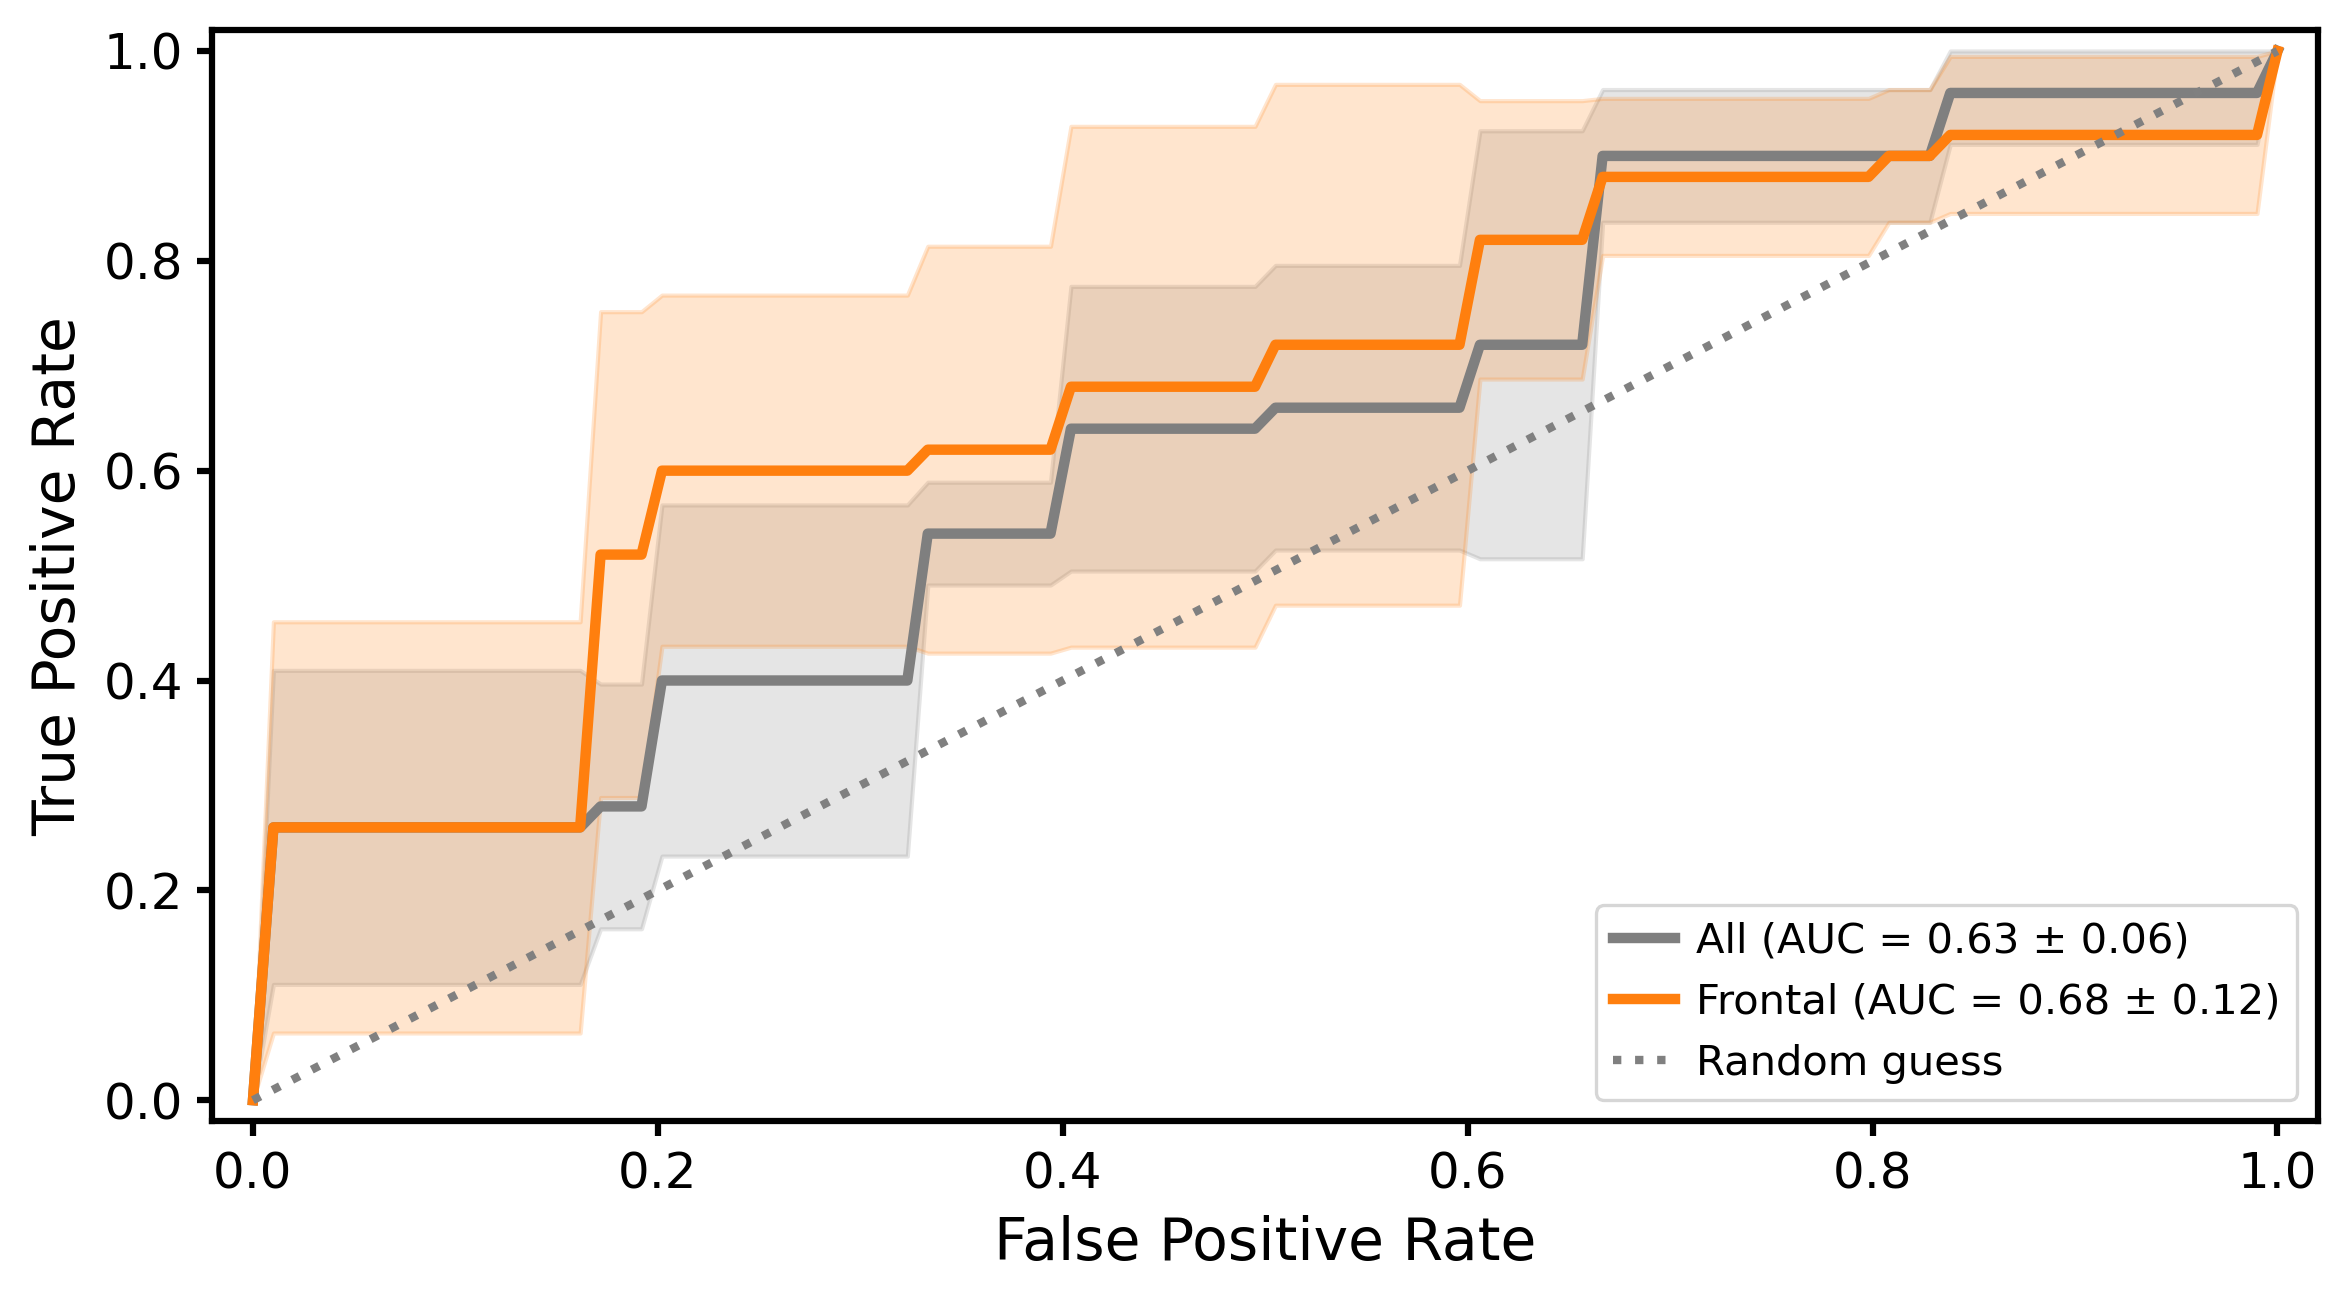

10-fold CV ROC results saved to: /mnt/dataset1/zhuyan/narcosis_new/explain_new/TBF_analysis/results/TBF_AUC_fig3D_0320_cv10.pkl


In [11]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
# from scipy import interp  # 若使用旧版本scipy，可用 np.interp 替代

# ================
# 1. 准备数据
# ================
# 假设这两个函数已在其他位置定义:
#   extract_subject_statistics, filtered_data_combined_A, filtered_data_combined_B, ...
#   以及 channels_of_interest, channels_of_interest_all

# 这里示例先从函数中获取特征与标签
aggregated_features, aggregated_labels = extract_subject_statistics(
    filtered_data_combined_A,
    filtered_data_combined_B,
    weights_2,
    channels_of_interest
)
aggregated_features_all, aggregated_labels_all = extract_subject_statistics(
    filtered_data_combined_A,
    filtered_data_combined_B,
    weights_2,
    channels_of_interest_all
)

aggregated_features = np.array(aggregated_features)
aggregated_labels   = np.array(aggregated_labels)
aggregated_features_all = np.array(aggregated_features_all)
aggregated_labels_all   = np.array(aggregated_labels_all)

# ================
# 2. 定义画平均ROC的函数
# ================
def cross_val_roc_auc(features, labels, n_splits=5, random_state=220):
    """
    对给定的 features/labels 做 n_splits 折交叉验证，
    返回用于绘制平均ROC的 (mean_fpr, mean_tpr, mean_auc, std_tpr) 等。
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # 预定义一个固定 fpr 网格，用于插值所有折的 tpr
    mean_fpr = np.linspace(0, 1, 100)
    
    tprs = []
    aucs = []

    for train_idx, test_idx in skf.split(features, labels):
        X_train, X_test = features[train_idx], features[test_idx]
        y_train, y_test = labels[train_idx], labels[test_idx]

        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        # 使用 decision_function 或 predict_proba[:,1] 获取连续预测评分
        y_score = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        fold_auc = auc(fpr, tpr)
        aucs.append(fold_auc)
        
        # 将当前折的 tpr 插值到 mean_fpr 上
        tpr_interp = np.interp(mean_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        tprs.append(tpr_interp)

    # 计算所有折的平均 TPR 及标准差
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    std_tpr = np.std(tprs, axis=0)

    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    return mean_fpr, mean_tpr, std_tpr, mean_auc, std_auc


# ================
# 3. 计算 Frontal 和 All 的平均ROC
# ================
mean_fpr_f, mean_tpr_f, std_tpr_f, mean_auc_f, std_auc_f = cross_val_roc_auc(
    aggregated_features, aggregated_labels, n_splits=5
)

mean_fpr_a, mean_tpr_a, std_tpr_a, mean_auc_a, std_auc_a = cross_val_roc_auc(
    aggregated_features_all, aggregated_labels_all, n_splits=5
)

# ================
# 4. 绘制平均 ROC
# ================
# 如果你想要与之前相同的绘图格式，可以把下面的绘图参数进行相应替换
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.linewidth': 1.5,
    'legend.fontsize': 10,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
})

fig, ax = plt.subplots(figsize=(8, 4.5))

# 1) 绘制 All 的平均 ROC
ax.plot(mean_fpr_a, mean_tpr_a,
        label=(f'All (AUC = {mean_auc_a:.2f} ± {std_auc_a:.2f})'),
        lw=2.5, linestyle='-', color='#7F7F7F')

# 可选择绘制 All 的标准差带
tpr_upper_a = np.minimum(mean_tpr_a + std_tpr_a, 1)
tpr_lower_a = np.maximum(mean_tpr_a - std_tpr_a, 0)
ax.fill_between(mean_fpr_a, tpr_lower_a, tpr_upper_a, color='#7F7F7F', alpha=0.2)

# 2) 绘制 Frontal 的平均 ROC
ax.plot(mean_fpr_f, mean_tpr_f,
        label=(f'Frontal (AUC = {mean_auc_f:.2f} ± {std_auc_f:.2f})'),
        lw=2.5, linestyle='-', color='#FF7F0E')

# 同样绘制标准差带
tpr_upper_f = np.minimum(mean_tpr_f + std_tpr_f, 1)
tpr_lower_f = np.maximum(mean_tpr_f - std_tpr_f, 0)
ax.fill_between(mean_fpr_f, tpr_lower_f, tpr_upper_f, color='#FF7F0E', alpha=0.2)

# 绘制对角线
ax.plot([0, 1], [0, 1], color='gray', linestyle=':', lw=2, label='Random guess')

# 坐标与网格设置
ax.set(xlim=[-0.02, 1.02],
       ylim=[-0.02, 1.02],
       xlabel='False Positive Rate',
       ylabel='True Positive Rate')
ax.set_xticks(np.linspace(0, 1, 6))
ax.set_yticks(np.linspace(0, 1, 6))
ax.tick_params(width=1.5)

# 图例设置
legend = ax.legend(loc='lower right', frameon=True,
                   handlelength=1.5, handletextpad=0.5,
                   borderpad=0.4, edgecolor='0.8')
legend.get_frame().set_linewidth(0.8)

# 调整边框线宽
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

# ================
# 5. 保存结果（可选）
# ================
# 如果还要将交叉验证计算得到的相关结果保存到 pkl 文件，可用以下操作
results = {
    'Frontal': {
        'mean_fpr': mean_fpr_f,
        'mean_tpr': mean_tpr_f,
        'std_tpr' : std_tpr_f,
        'mean_auc': mean_auc_f,
        'std_auc' : std_auc_f
    },
    'All': {
        'mean_fpr': mean_fpr_a,
        'mean_tpr': mean_tpr_a,
        'std_tpr' : std_tpr_a,
        'mean_auc': mean_auc_a,
        'std_auc' : std_auc_a
    }
}

save_root = '/mnt/dataset1/zhuyan/narcosis_new/explain_new/TBF_analysis/results'
os.makedirs(save_root, exist_ok=True)
save_file = os.path.join(save_root, 'TBF_AUC_fig3D_0320_cv10.pkl')

with open(save_file, 'wb') as f:
    pickle.dump(results, f)

print(f"10-fold CV ROC results saved to: {save_file}")


In [18]:
# 这里开始是fig3D最后要保留的代码
import pickle

load_file = '../dataset/TBF_AUC_fig3D.pkl'
with open(load_file, 'rb') as f:
    TBF_fig3D_results = pickle.load(f)

fpr = TBF_fig3D_results['fpr']
tpr = TBF_fig3D_results['tpr']
roc_auc = TBF_fig3D_results['roc_auc']
fpr_all = TBF_fig3D_results['fpr_all']
tpr_all = TBF_fig3D_results['tpr_all']
roc_auc_all = TBF_fig3D_results['roc_auc_all']

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

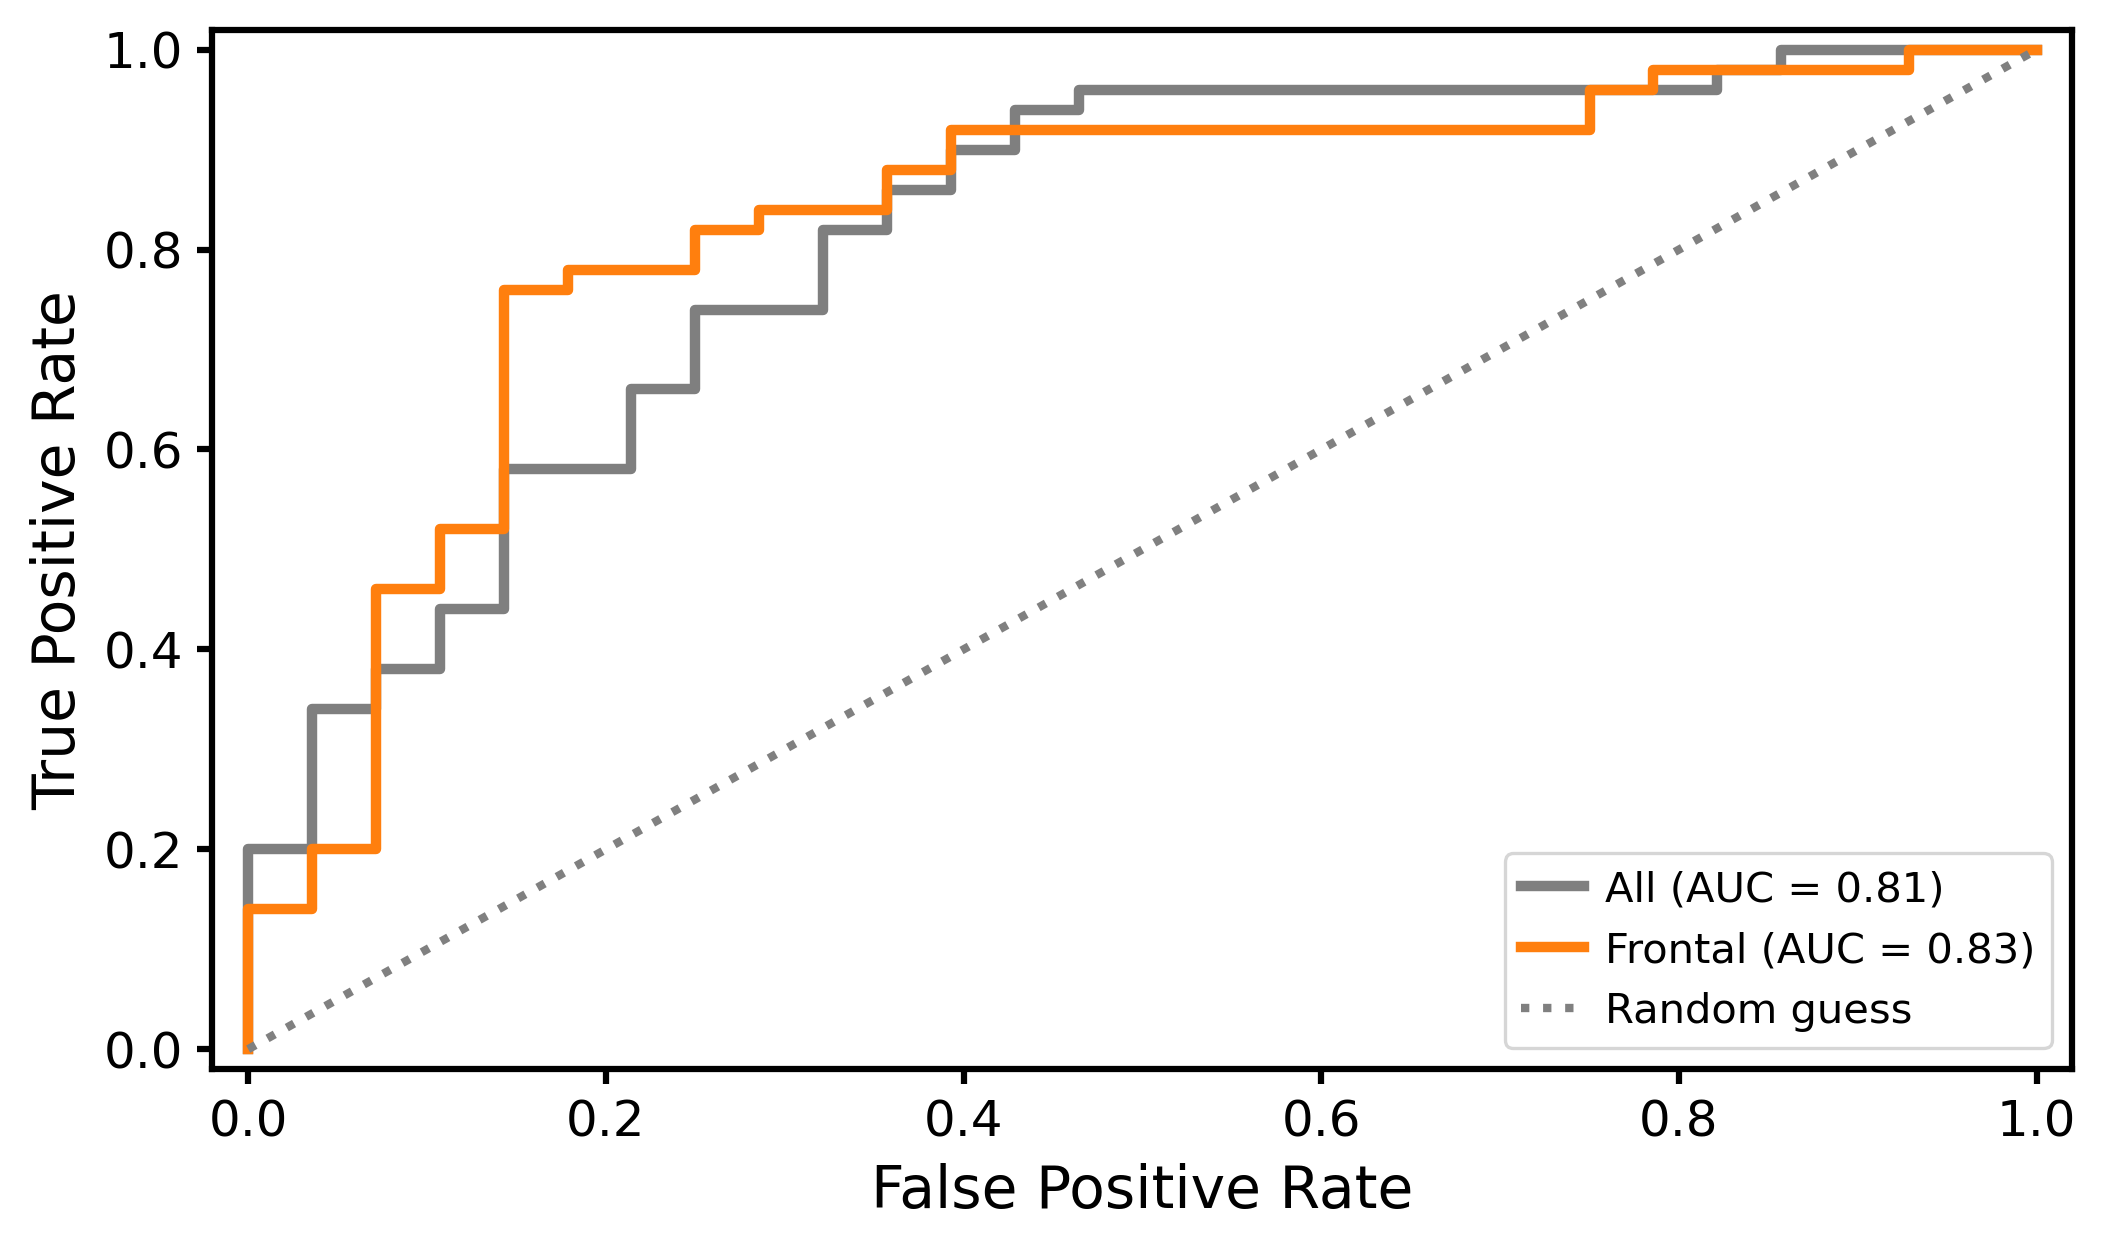

In [19]:
import matplotlib.pyplot as plt

# 设置SCI期刊常用绘图参数
plt.rcParams.update({
    'font.family': 'Times New Roman',  # 期刊推荐字体
    'font.size': 12,                   # 基础字号
    'axes.labelsize': 14,              # 轴标签字号
    'axes.linewidth': 1.5,             # 轴线宽
    'legend.fontsize': 10,             # 图例字号
    'xtick.labelsize': 12,             # X轴刻度字号
    'ytick.labelsize': 12,             # Y轴刻度字号
    'pdf.fonttype': 42,                # 确保输出文字可编辑
    'ps.fonttype': 42,
    'figure.dpi': 300                  # 高分辨率
})

# 创建图形
fig, ax = plt.subplots(figsize=(8, 4.5))  # 更紧凑的尺寸（单位：英寸）

# 绘制ROC曲线（使用色盲友好颜色）


ax.plot(fpr_all, tpr_all, 
        color='#7F7F7F',         # 蓝色
        lw=2.5,
        linestyle='-',          # 虚线
        label=f'All (AUC = {roc_auc_all:.2f})')

ax.plot(fpr, tpr, 
        color= '#FF7F0E',         # 橙色
        lw=2.5,                  # 适当线宽
        linestyle='-',           # 实线
        label=f'Frontal (AUC = {roc_auc:.2f})')

# 绘制对角线
ax.plot([0, 1], [0, 1], 
        color='gray', 
        linestyle=':',          # 点线
        lw=2, 
        label='Random guess')

# 坐标轴设置
ax.set(xlim=[-0.02, 1.02],      # 留白2%
       ylim=[-0.02, 1.02],
       xlabel='False Positive Rate',
       ylabel='True Positive Rate')

# 刻度设置
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(width=1.5)       # 刻度线宽

# 图例设置
# legend = ax.legend(loc='lower right', 
#                   frameon=True, 
#                   framealpha=0.8,
#                   edgecolor='black')
# legend.get_frame().set_linewidth(1.5)  # 图例边框线宽
legend = ax.legend(loc='lower right', frameon=True, 
                  handlelength=1.5, handletextpad=0.5,
                  borderpad=0.4, edgecolor='0.8')
legend.get_frame().set_linewidth(0.8)

# 网格设置
# ax.grid(True, 
#         linestyle='--', 
#         alpha=0.3, 
#         linewidth=0.8)

# 调整边框线宽
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# 保存多种格式（根据期刊要求选择）
# plt.savefig('ROC_curve.tiff', dpi=300, bbox_inches='tight')  # 常用位图格式
# plt.savefig('ROC_curve.pdf', bbox_inches='tight')            # 矢量图格式

plt.show()